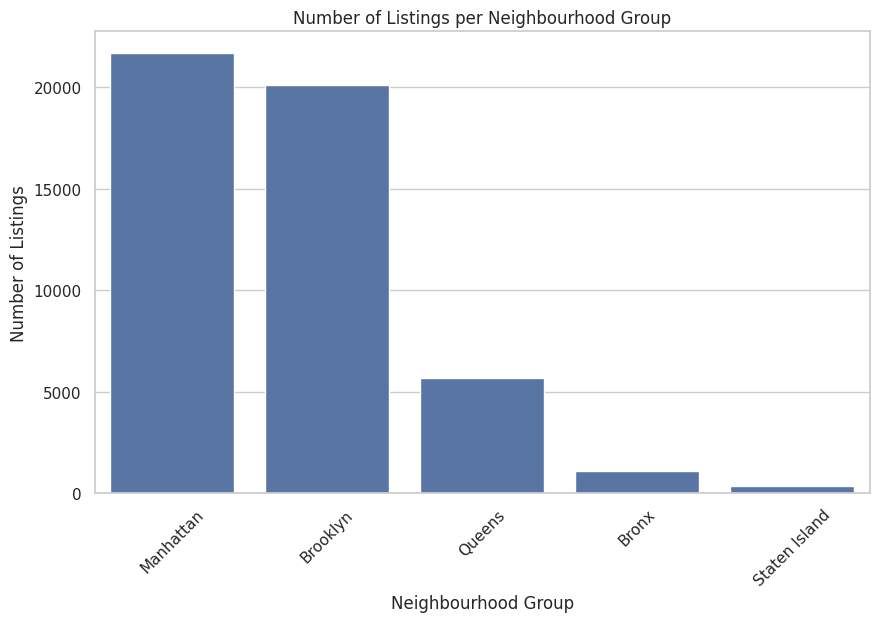

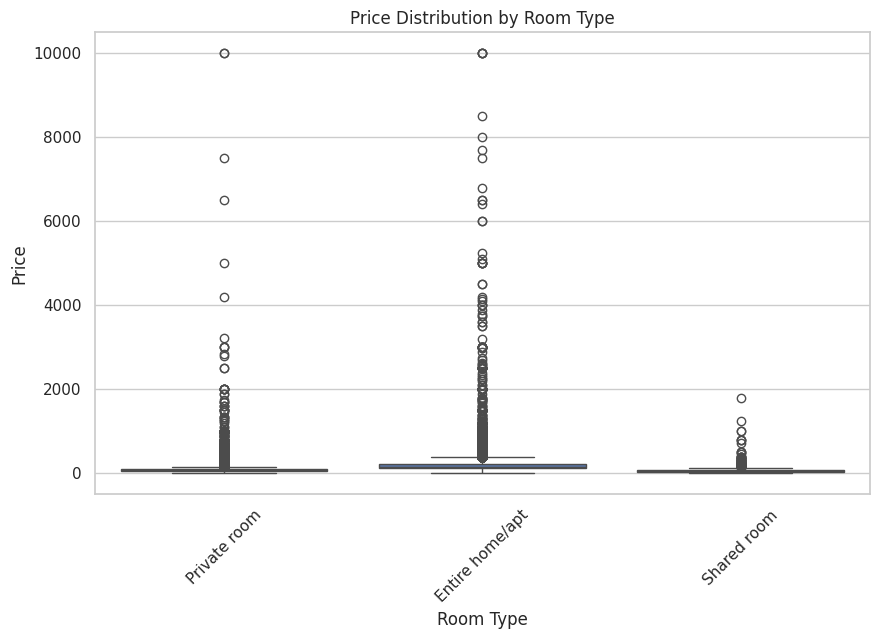

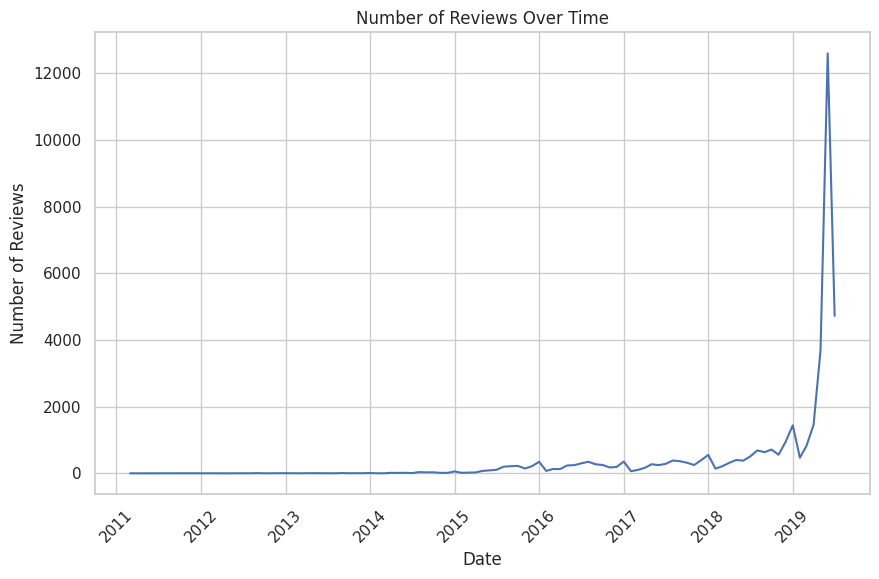

/tmp/ipykernel_473514/1756158202.py:50: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


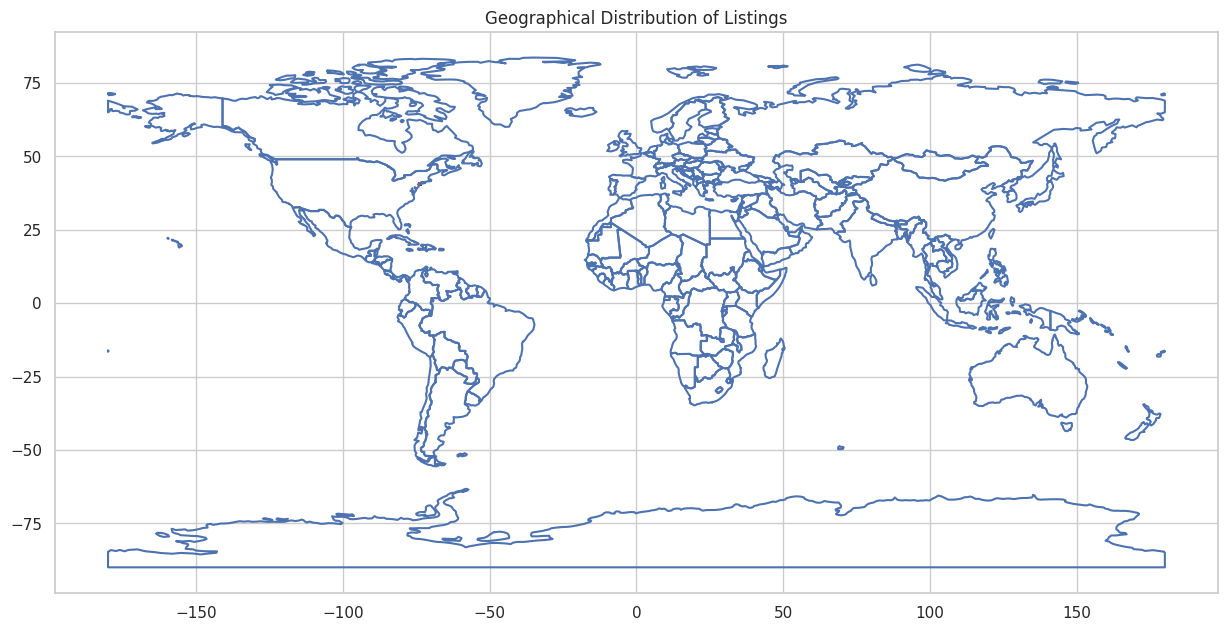

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the data
file_path = 'AB_NYC_2019.csv'  # Update with your actual dataset path
df = pd.read_csv(file_path)

# Bar Plot of Neighbourhood Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Box Plot of Prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Line Plot of Reviews Over Time
df['last_review'] = pd.to_datetime(df['last_review'])
df_reviews_time = df.groupby(df['last_review'].dt.to_period('M')).size().reset_index(name='number_of_reviews')
df_reviews_time['last_review'] = df_reviews_time['last_review'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_reviews_time, x='last_review', y='number_of_reviews')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Bubble Map of Listings
import geopandas as gpd
from shapely.geometry import Point

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5)
plt.title('Geographical Distribution of Listings')
plt.show()


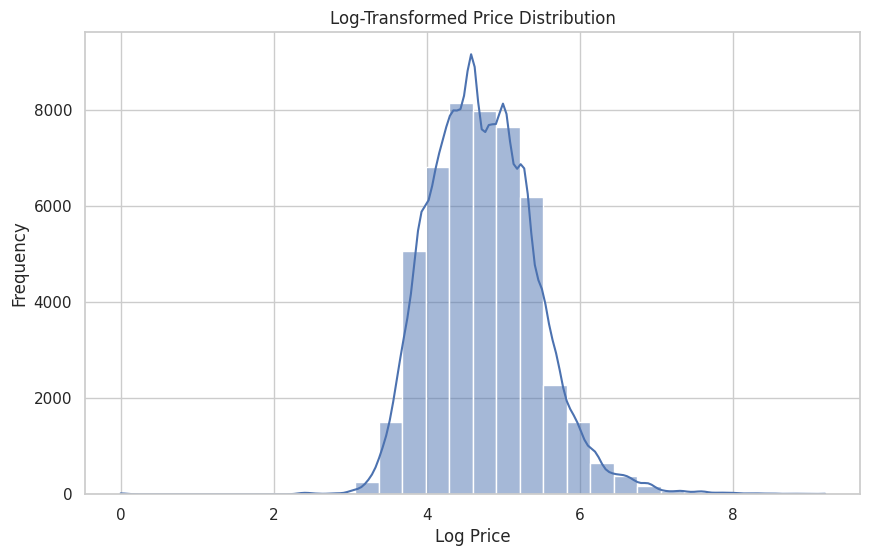

/tmp/ipykernel_473514/433192682.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['log_price'], shade=True)


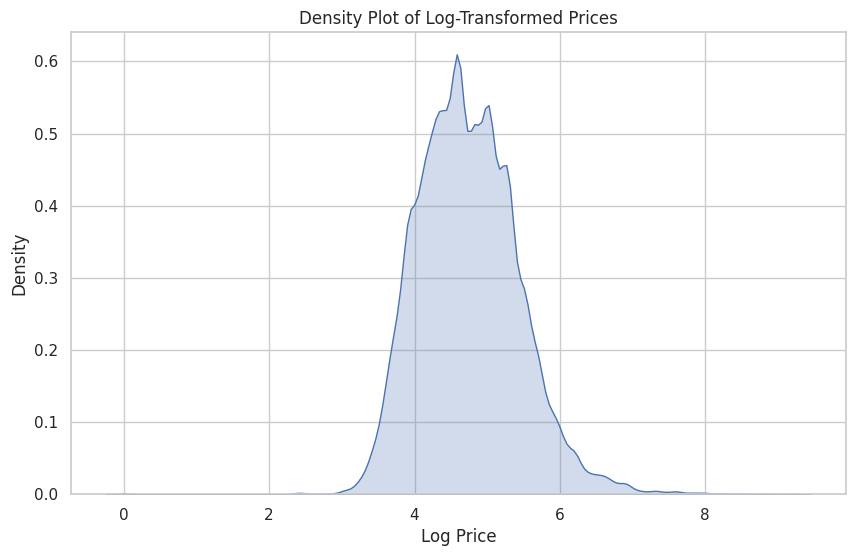

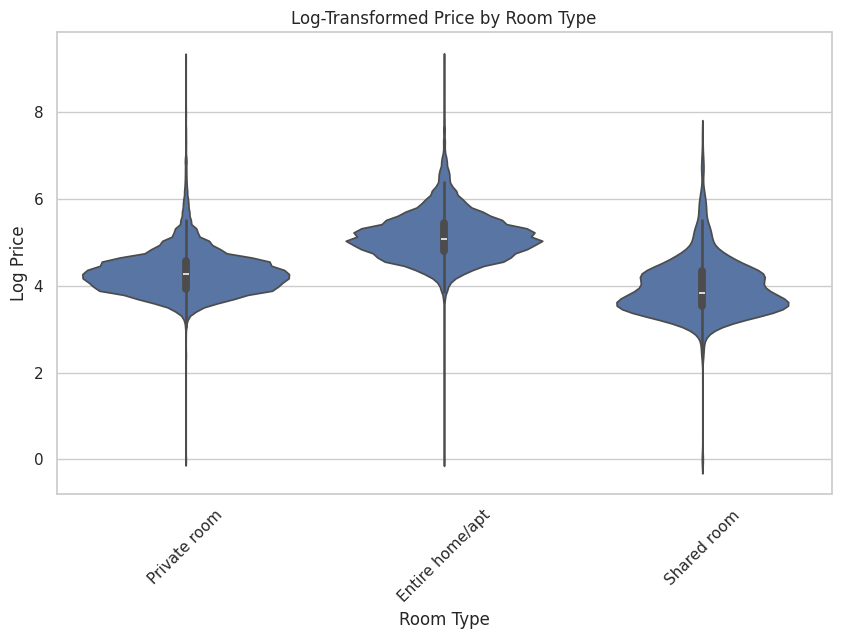

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Apply log transformation to price
df['log_price'] = np.log1p(df['price'])

# Histogram of Log-Transformed Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=30, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

# Density Plot of Log-Transformed Prices
plt.figure(figsize=(10, 6))
sns.kdeplot(df['log_price'], shade=True)
plt.title('Density Plot of Log-Transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.show()

# Scatter Plot of Log-Transformed Prices vs Room Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='room_type', y='log_price')
plt.title('Log-Transformed Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_473514/2505170705.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


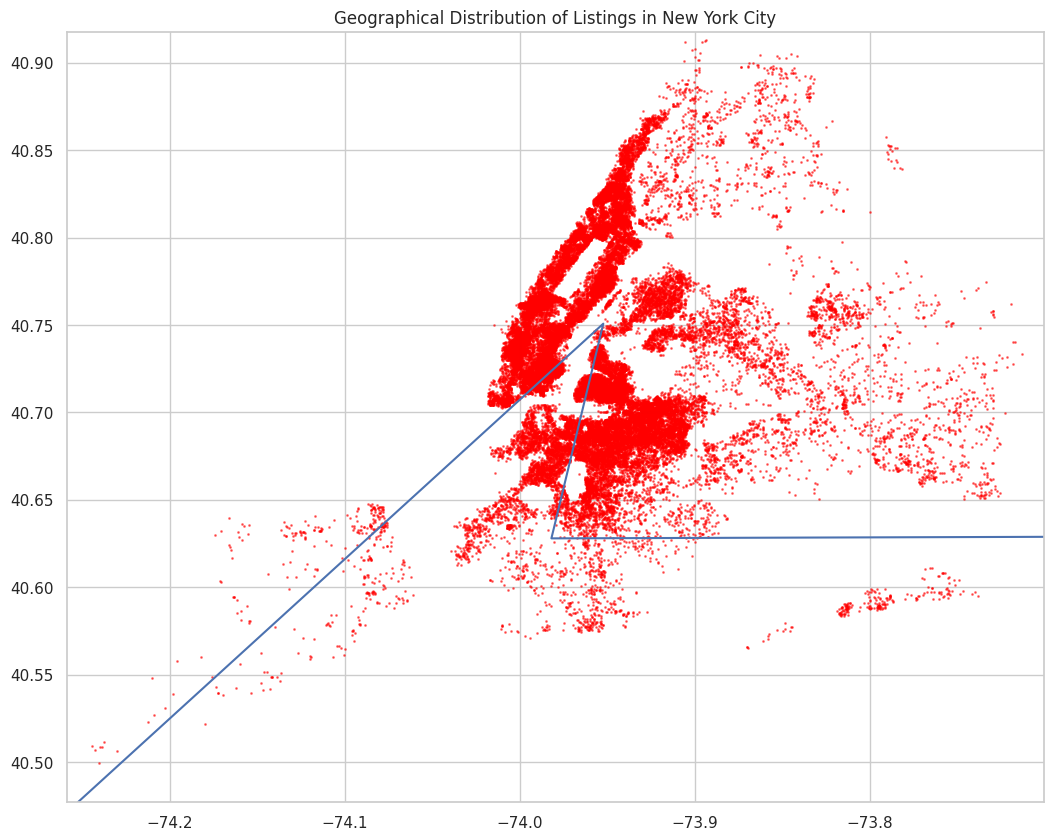

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the data
df = pd.read_csv(file_path)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Define New York City boundaries
nyc_boundaries = {
    "lat_min": 40.4774,
    "lat_max": 40.9176,
    "lon_min": -74.2591,
    "lon_max": -73.7004
}

# Filter the GeoDataFrame to only include points within NYC boundaries
gdf_nyc = gdf[
    (gdf['latitude'] >= nyc_boundaries['lat_min']) &
    (gdf['latitude'] <= nyc_boundaries['lat_max']) &
    (gdf['longitude'] >= nyc_boundaries['lon_min']) &
    (gdf['longitude'] <= nyc_boundaries['lon_max'])
]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax)
gdf_nyc.plot(ax=ax, markersize=1, color='red', alpha=0.5)
plt.xlim(nyc_boundaries['lon_min'], nyc_boundaries['lon_max'])
plt.ylim(nyc_boundaries['lat_min'], nyc_boundaries['lat_max'])
plt.title('Geographical Distribution of Listings in New York City')
plt.show()


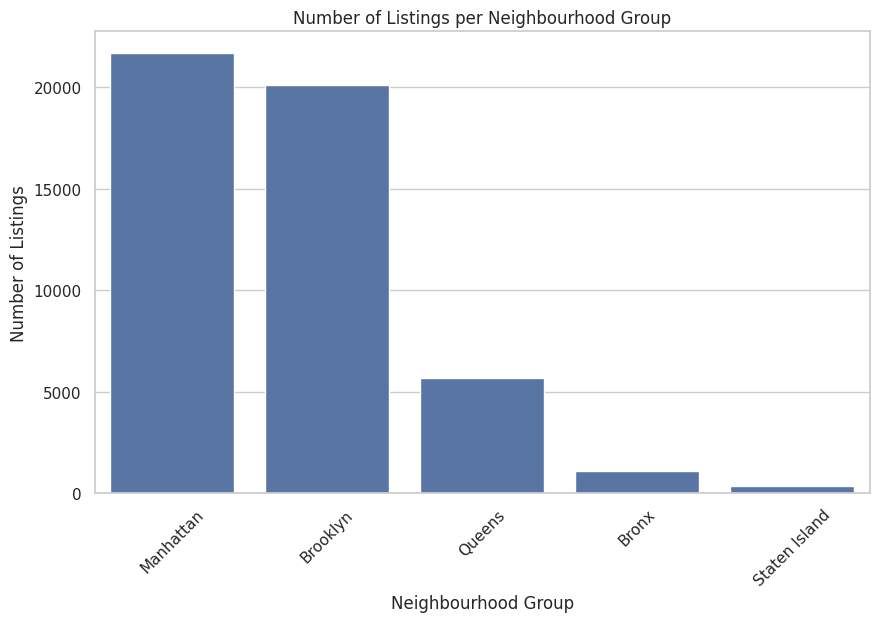

/tmp/ipykernel_473514/2314166800.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['log_price'], shade=True)


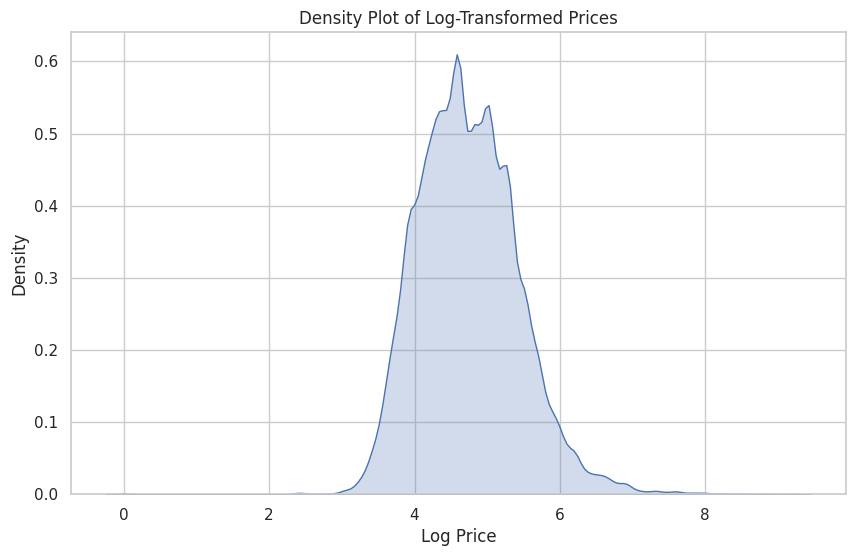

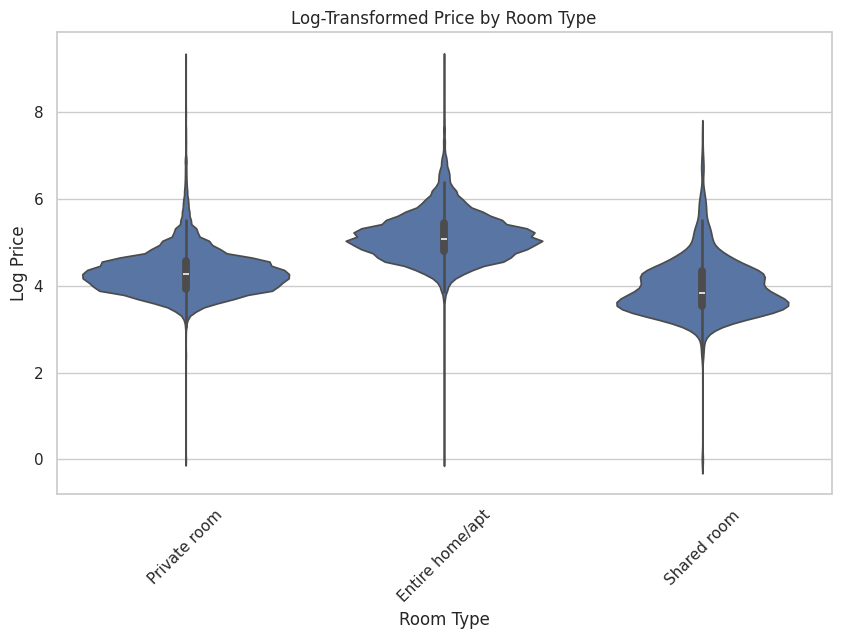

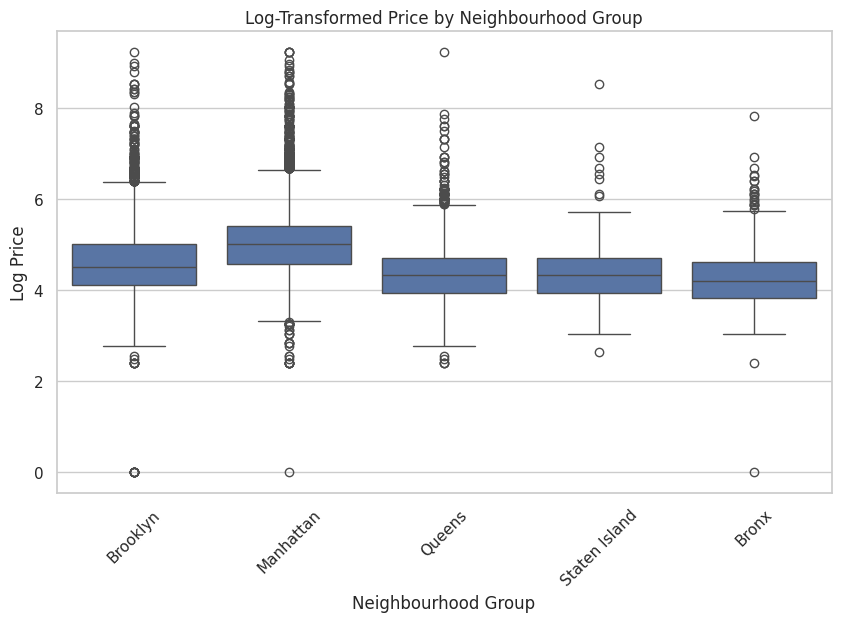

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(file_path)

# Apply log transformation to price
df['log_price'] = np.log1p(df['price'])

# Bar Plot for Neighbourhood Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Density Plot for Log-Transformed Prices
plt.figure(figsize=(10, 6))
sns.kdeplot(df['log_price'], shade=True)
plt.title('Density Plot of Log-Transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.show()

# Violin Plot for Log-Transformed Prices by Room Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='room_type', y='log_price')
plt.title('Log-Transformed Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Log-Transformed Prices by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='log_price')
plt.title('Log-Transformed Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()


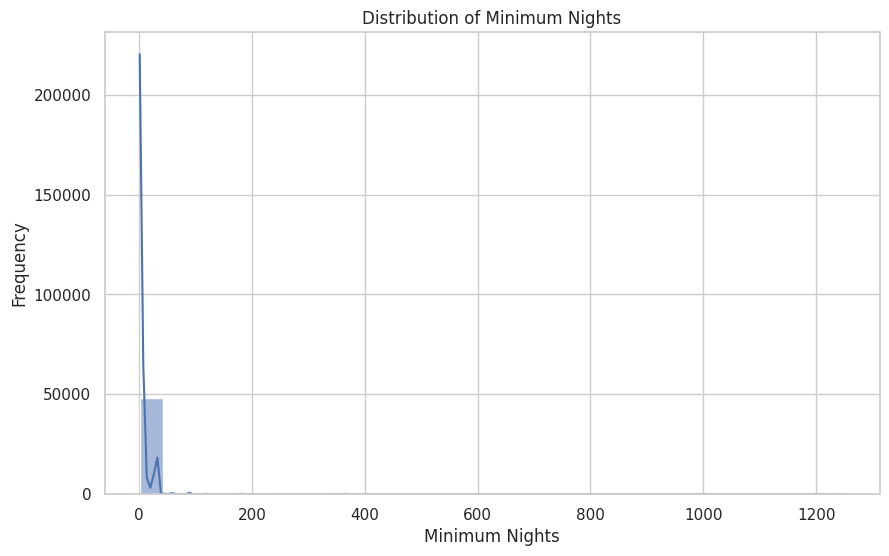

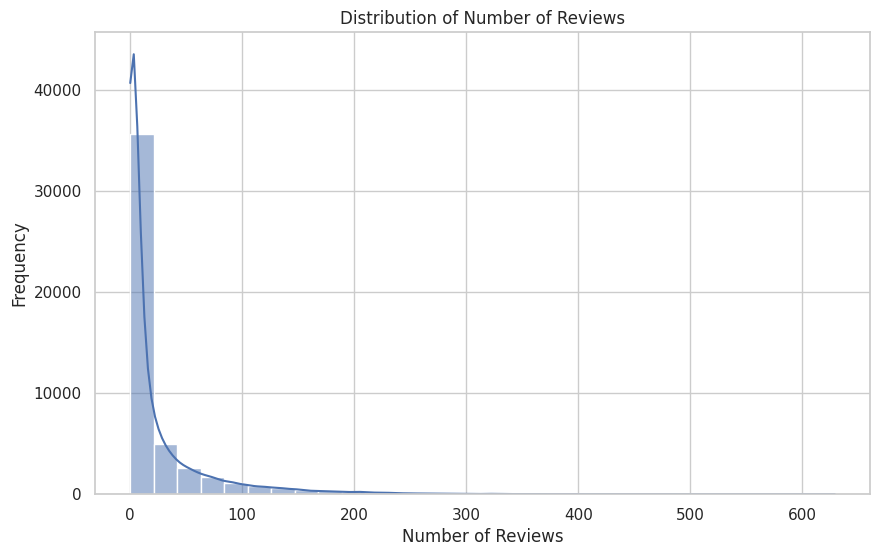

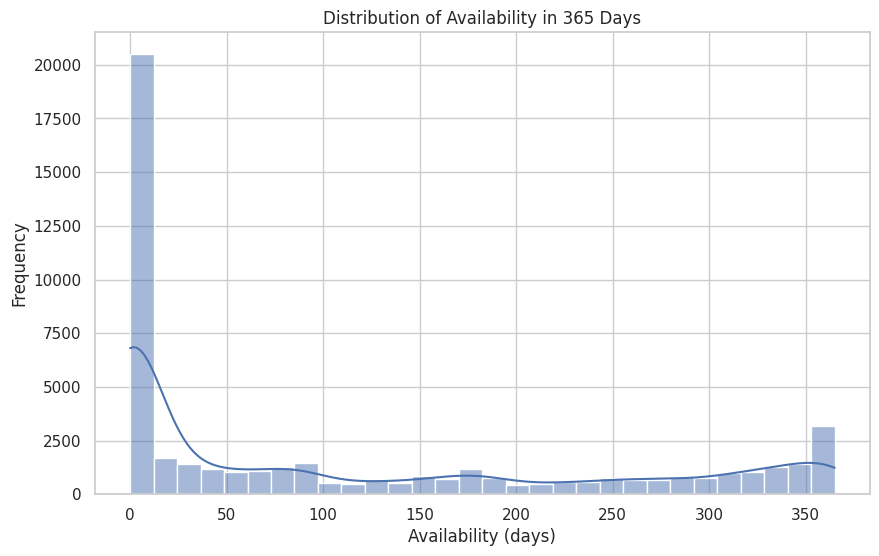

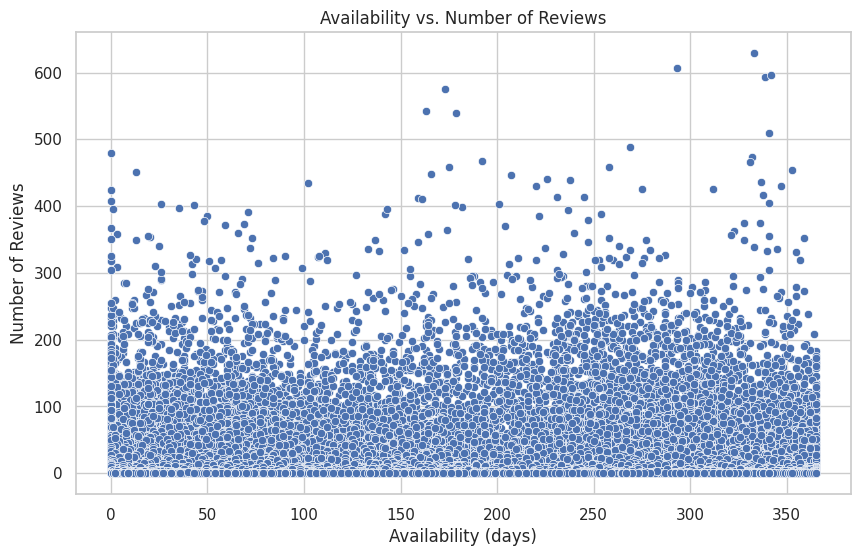

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(file_path)

# Histogram for Minimum Nights
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

# Histogram for Number of Reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=30, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Histogram for Availability in 365 Days
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True)
plt.title('Distribution of Availability in 365 Days')
plt.xlabel('Availability (days)')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Availability vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='number_of_reviews')
plt.title('Availability vs. Number of Reviews')
plt.xlabel('Availability (days)')
plt.ylabel('Number of Reviews')
plt.show()


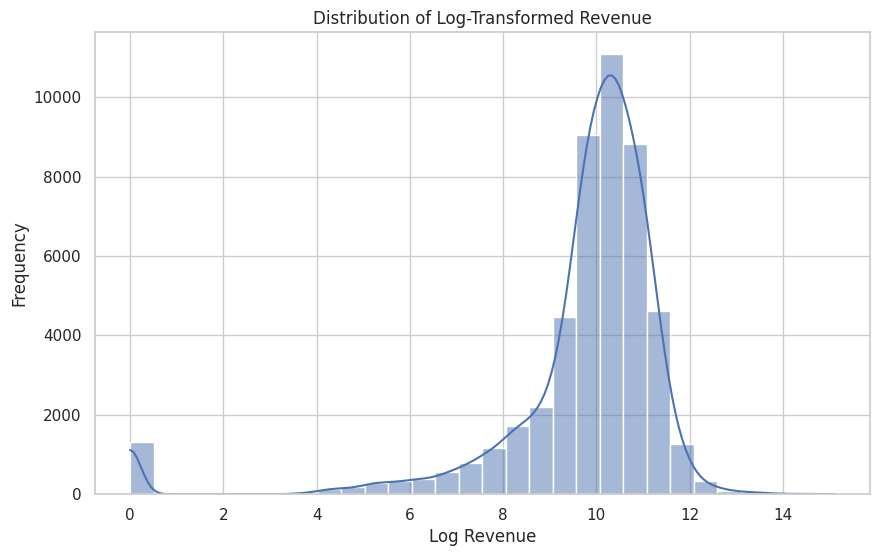

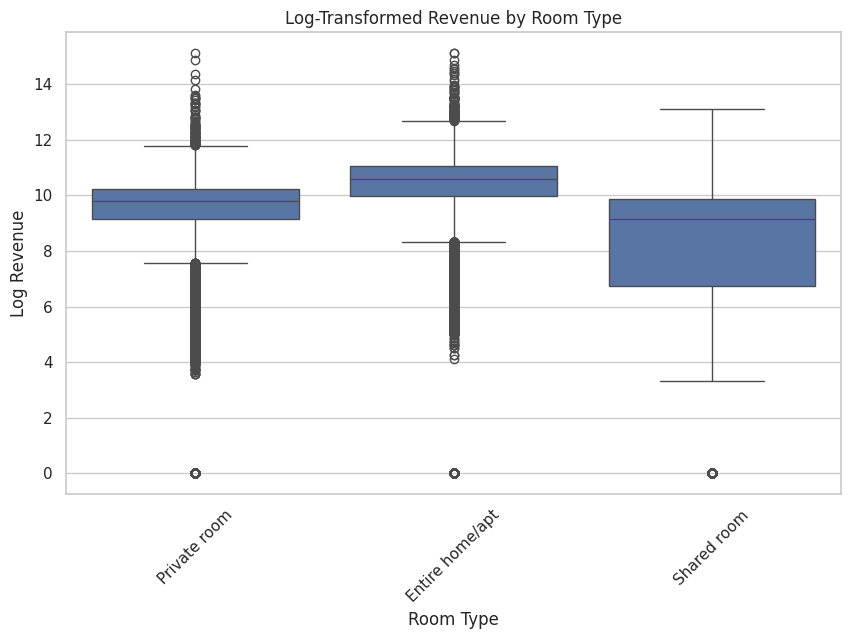

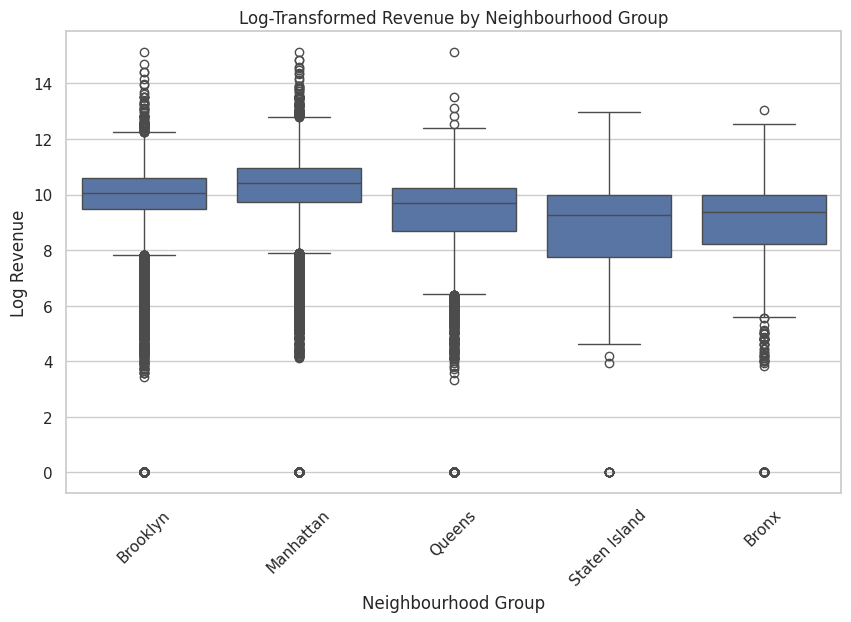

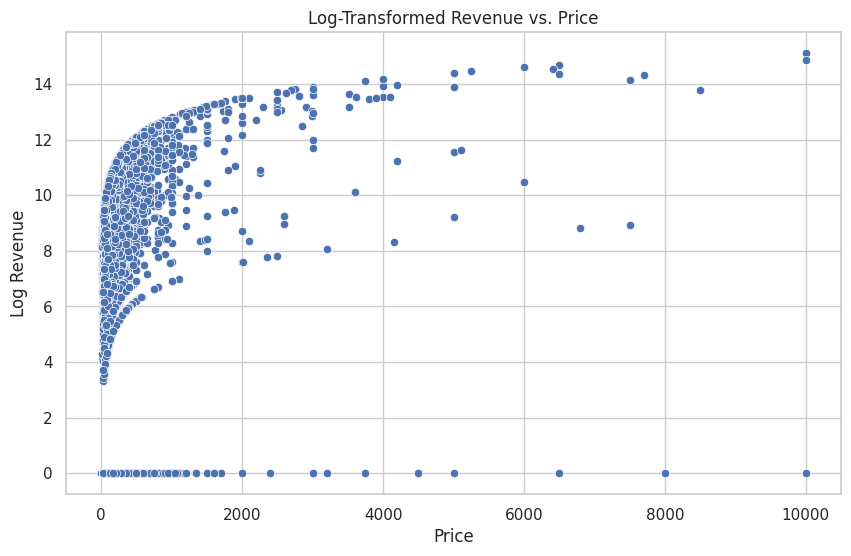

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Apply log transformation to revenue
df['log_revenue'] = np.log1p(df['revenue'])

# Histogram of Log-Transformed Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['log_revenue'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Revenue')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Log-Transformed Revenue by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='log_revenue')
plt.title('Log-Transformed Revenue by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)
plt.show()

# Box Plot of Log-Transformed Revenue by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='log_revenue')
plt.title('Log-Transformed Revenue by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot of Log-Transformed Revenue vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='log_revenue')
plt.title('Log-Transformed Revenue vs. Price')
plt.xlabel('Price')
plt.ylabel('Log Revenue')
plt.show()


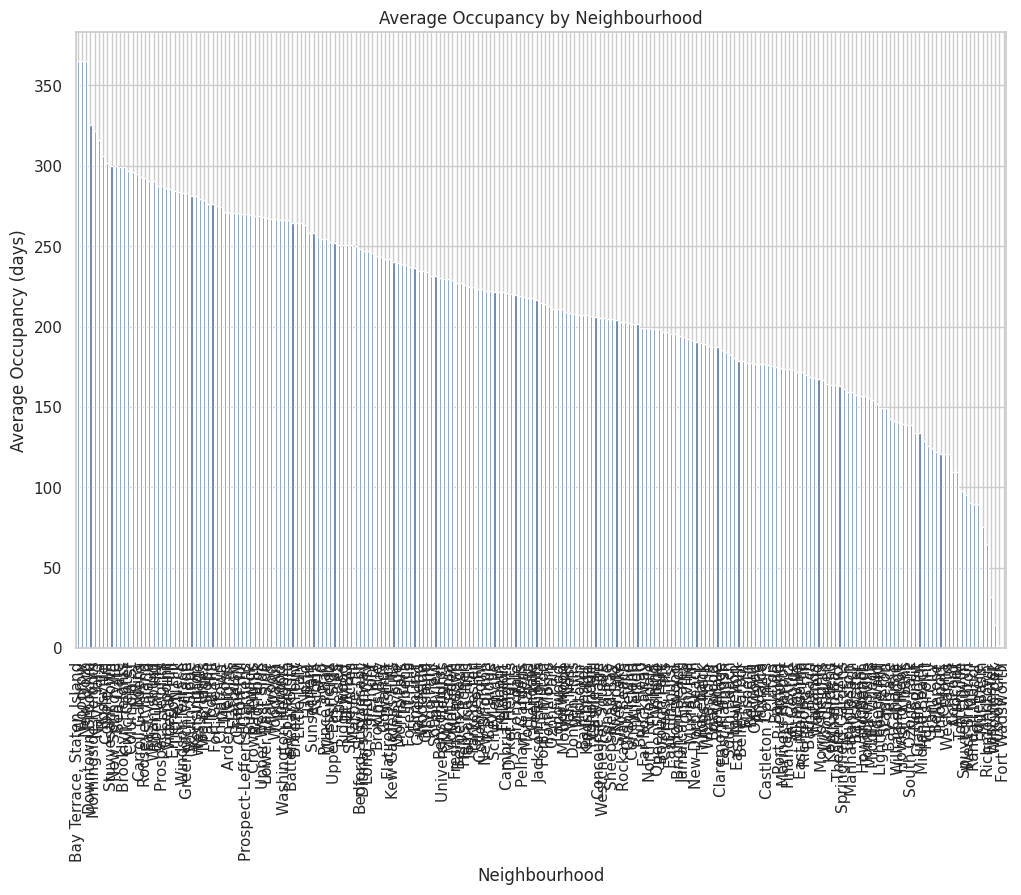

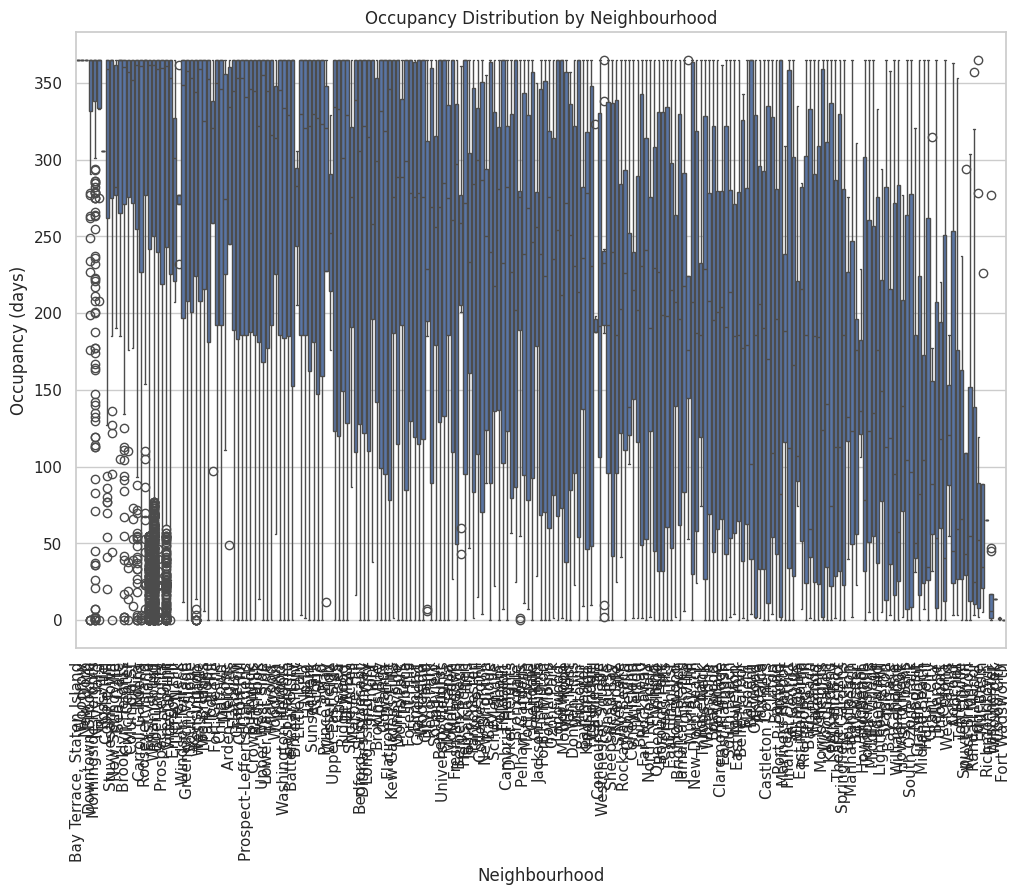

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy
df['occupancy'] = 365 - df['availability_365']

# Calculate average occupancy by neighbourhood
avg_occupancy_by_neighbourhood = df.groupby('neighbourhood')['occupancy'].mean().sort_values(ascending=False)

# Plot average occupancy by neighbourhood
plt.figure(figsize=(12, 8))
avg_occupancy_by_neighbourhood.plot(kind='bar')
plt.title('Average Occupancy by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Occupancy (days)')
plt.xticks(rotation=90)
plt.show()

# Box Plot of Occupancy by Neighbourhood
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='neighbourhood', y='occupancy', order=avg_occupancy_by_neighbourhood.index)
plt.title('Occupancy Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Occupancy (days)')
plt.xticks(rotation=90)
plt.show()


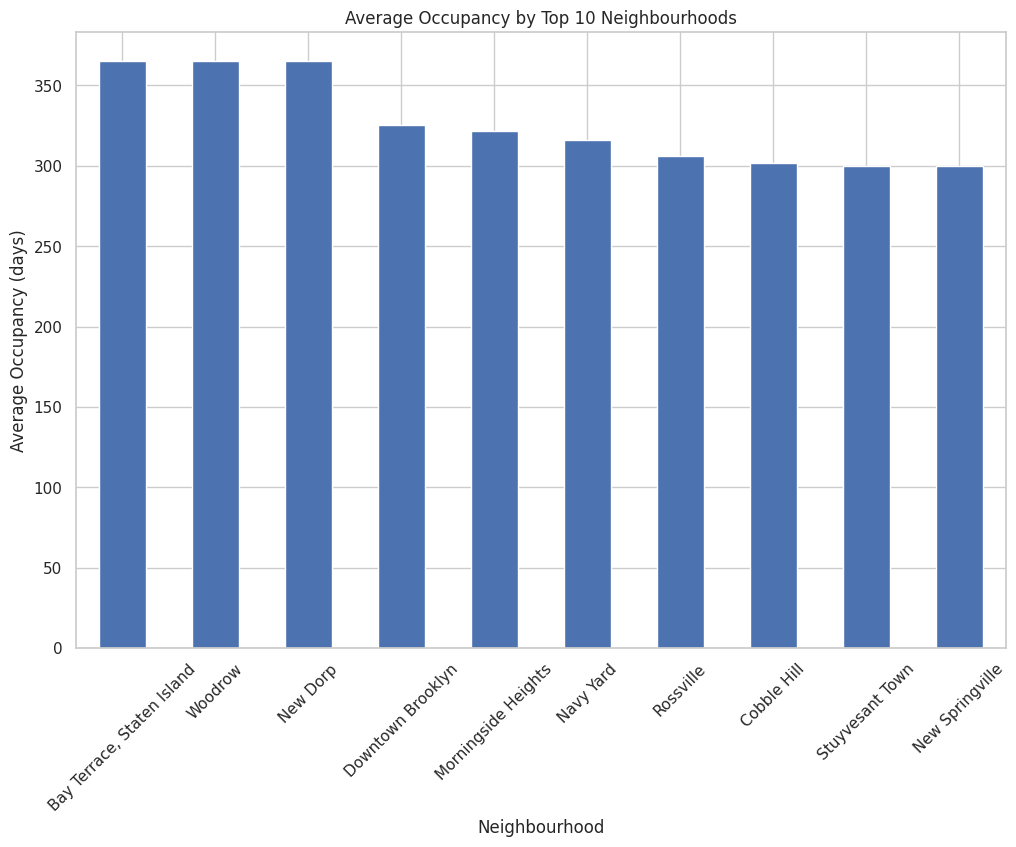

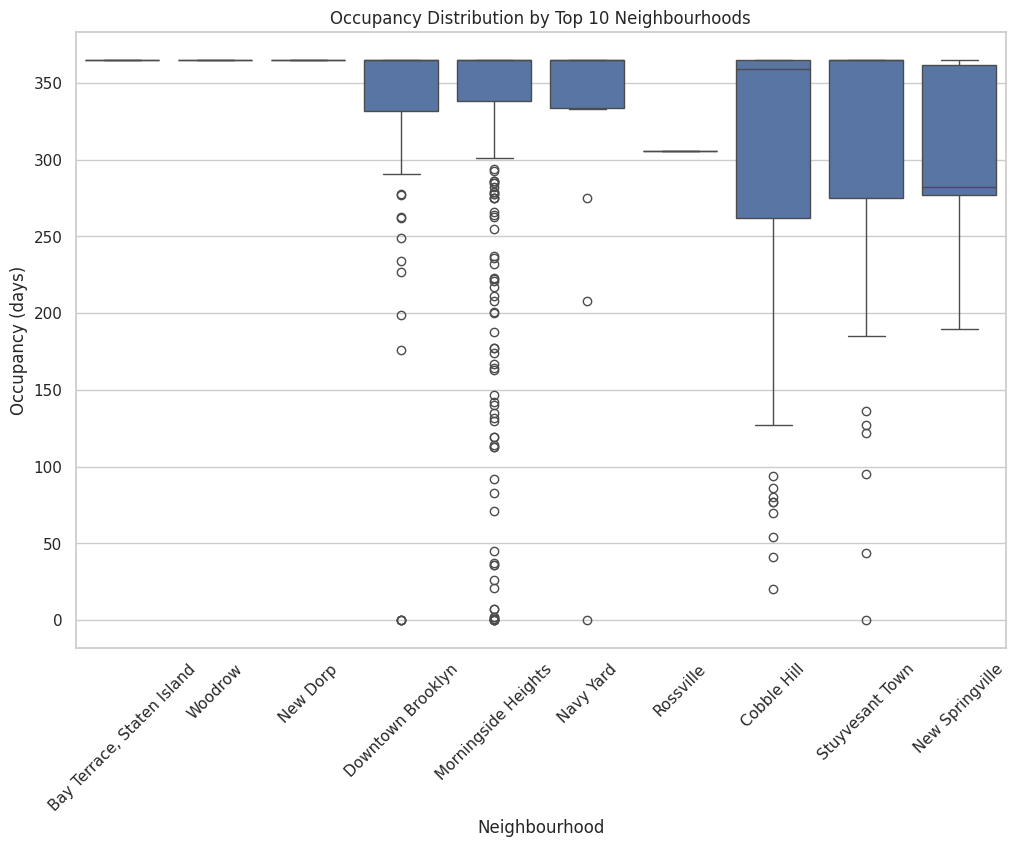

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy
df['occupancy'] = 365 - df['availability_365']

# Calculate average occupancy by neighbourhood
avg_occupancy_by_neighbourhood = df.groupby('neighbourhood')['occupancy'].mean().sort_values(ascending=False)

# Select top 10 neighbourhoods by average occupancy
top_10_neighbourhoods = avg_occupancy_by_neighbourhood.head(10)

# Filter the original dataframe to include only the top 10 neighbourhoods
df_top_10 = df[df['neighbourhood'].isin(top_10_neighbourhoods.index)]

# Plot average occupancy for top 10 neighbourhoods
plt.figure(figsize=(12, 8))
top_10_neighbourhoods.plot(kind='bar')
plt.title('Average Occupancy by Top 10 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Occupancy (days)')
plt.xticks(rotation=45)
plt.show()

# Box Plot of Occupancy for Top 10 Neighbourhoods
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='neighbourhood', y='occupancy', order=top_10_neighbourhoods.index)
plt.title('Occupancy Distribution by Top 10 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Occupancy (days)')
plt.xticks(rotation=45)
plt.show()


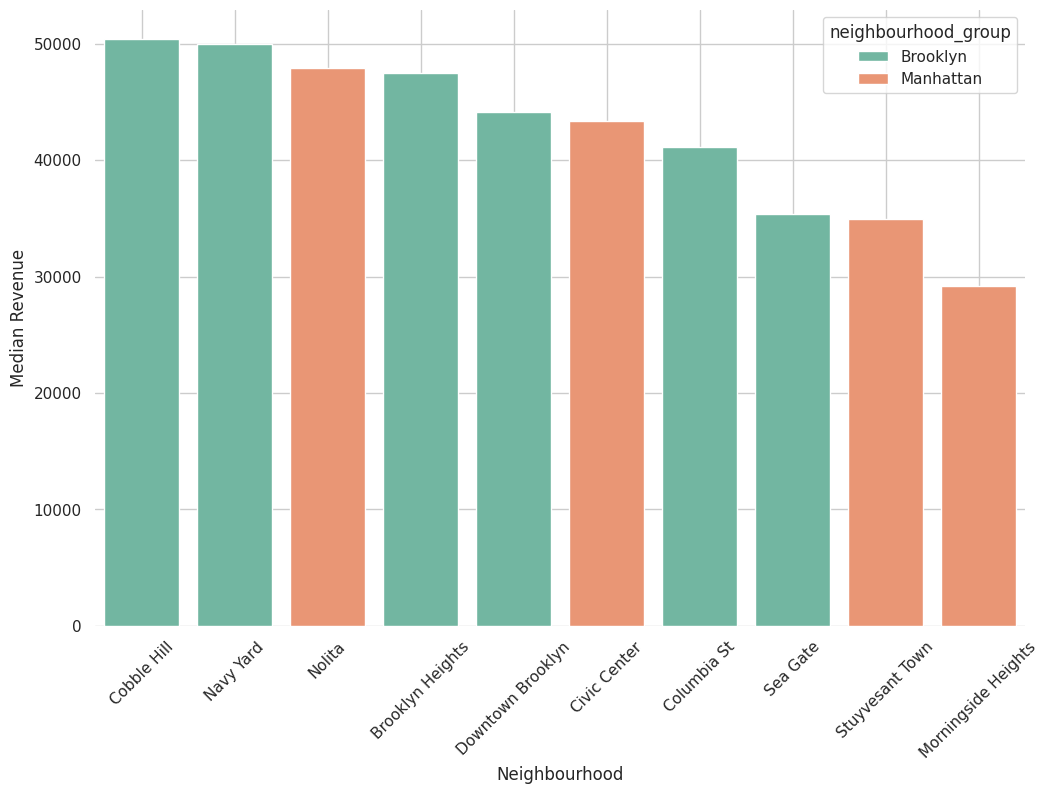

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Apply log transformation to revenue
df['log_revenue'] = np.log1p(df['revenue'])

df = df[df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn'])]

# Calculate average occupancy by neighbourhood
avg_occupancy_by_neighbourhood = df.groupby('neighbourhood')['occupancy'].mean().sort_values(ascending=False)

# Select top 10 neighbourhoods by average occupancy
top_10_neighbourhoods = avg_occupancy_by_neighbourhood.head(10)

# Filter the original dataframe to include only the top 10 neighbourhoods
df_top_10 = df[df['neighbourhood'].isin(top_10_neighbourhoods.index)]

# Plot average revenue for top 10 neighbourhoods
avg_revenue_by_neighbourhood = df_top_10.groupby(['neighbourhood', 'neighbourhood_group'])['revenue'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=avg_revenue_by_neighbourhood, x='neighbourhood', y='revenue', hue='neighbourhood_group', palette='Set2')

# plt.title('Average Revenue by Top 10 Most Occupied Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Revenue')
plt.xticks(rotation=45)

ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('neightrev.png', transparent=True)
plt.show()


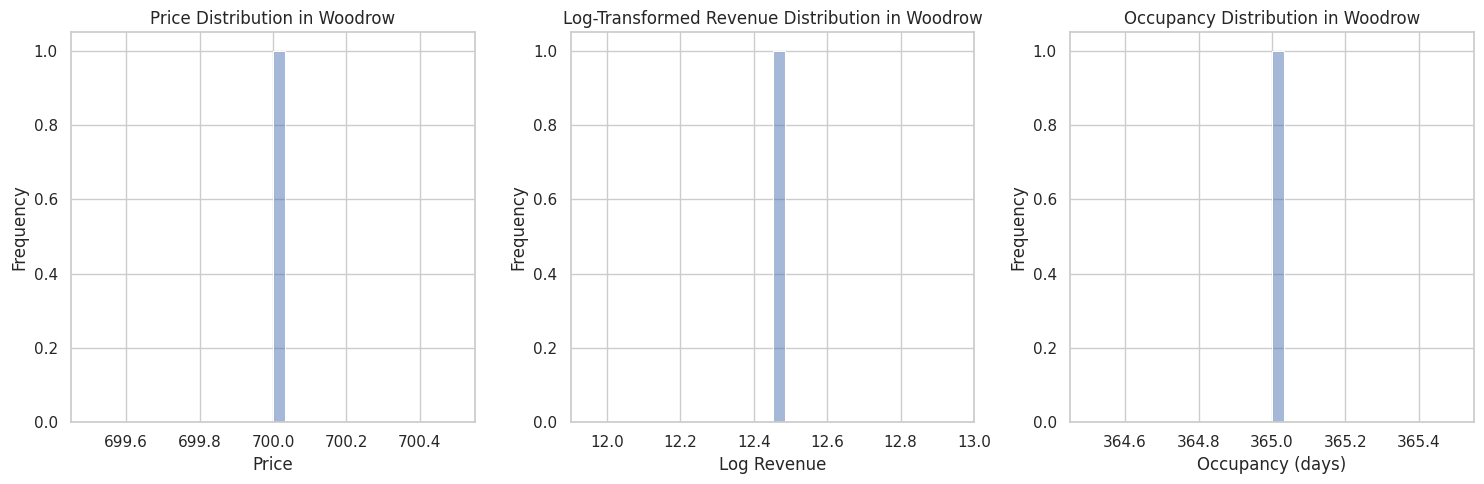

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Filter data for the Woodrow neighbourhood
woodrow_df = df[df['neighbourhood'] == 'Woodrow']

# Check if there are any entries for the Woodrow neighbourhood
if woodrow_df.empty:
    print("No data available for the Woodrow neighbourhood.")
else:
    # Histograms for Prices, Revenues, and Occupancy in Woodrow
    plt.figure(figsize=(15, 5))

    # Prices
    plt.subplot(1, 3, 1)
    sns.histplot(woodrow_df['price'], bins=30, kde=True)
    plt.title('Price Distribution in Woodrow')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    # Revenues (Log-Transformed)
    plt.subplot(1, 3, 2)
    sns.histplot(np.log1p(woodrow_df['revenue']), bins=30, kde=True)
    plt.title('Log-Transformed Revenue Distribution in Woodrow')
    plt.xlabel('Log Revenue')
    plt.ylabel('Frequency')

    # Occupancy
    plt.subplot(1, 3, 3)
    sns.histplot(woodrow_df['occupancy'], bins=30, kde=True)
    plt.title('Occupancy Distribution in Woodrow')
    plt.xlabel('Occupancy (days)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

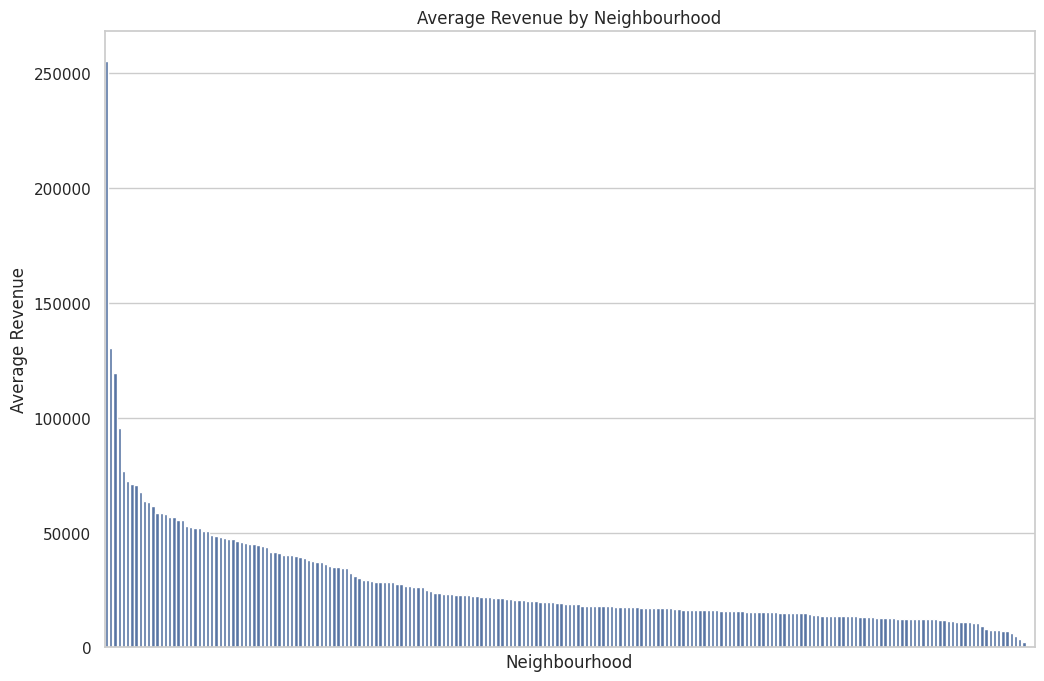

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Calculate average revenue by neighbourhood
avg_revenue_by_neighbourhood = df.groupby('neighbourhood')['revenue'].mean().sort_values(ascending=False)

# Plot average revenue by neighbourhood without x-axis labels
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_revenue_by_neighbourhood.index, y=avg_revenue_by_neighbourhood.values)
plt.title('Average Revenue by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Revenue')
plt.xticks([])  # Hide x-axis labels
plt.show()


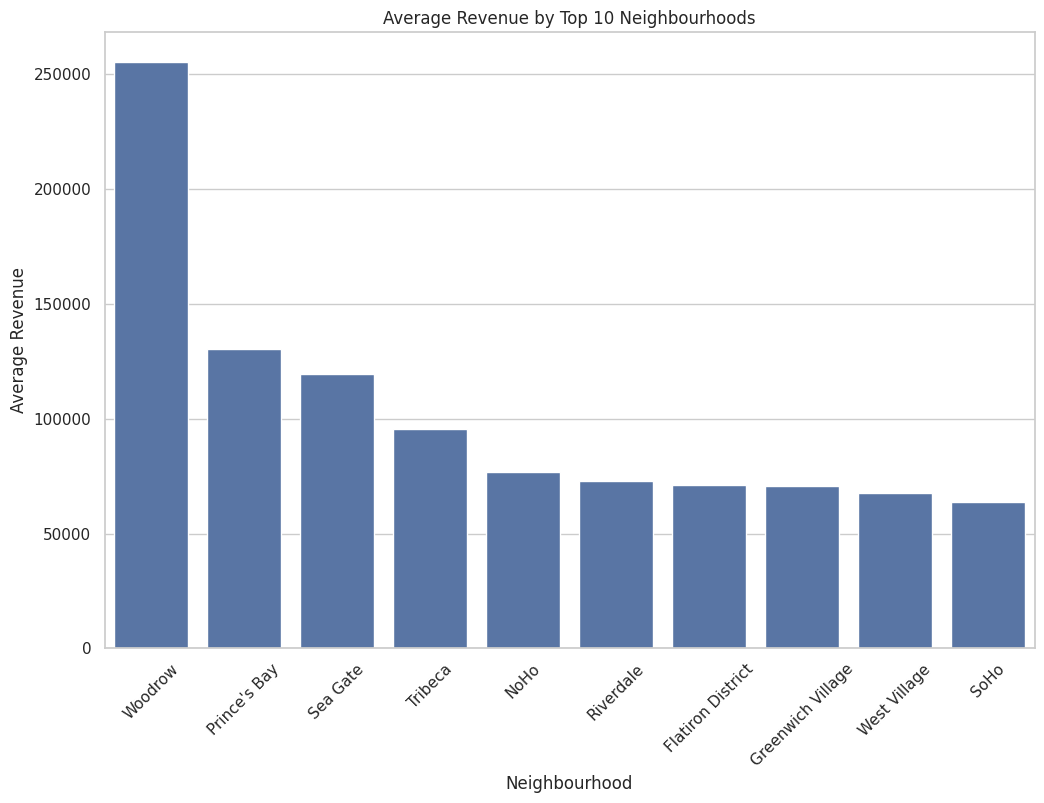

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Calculate average revenue by neighbourhood
avg_revenue_by_neighbourhood = df.groupby('neighbourhood')['revenue'].mean().sort_values(ascending=False)

# Select top 10 neighbourhoods by average revenue
top_10_neighbourhoods = avg_revenue_by_neighbourhood.head(10)

# Plot average revenue for top 10 neighbourhoods
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_neighbourhoods.index, y=top_10_neighbourhoods.values)
plt.title('Average Revenue by Top 10 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


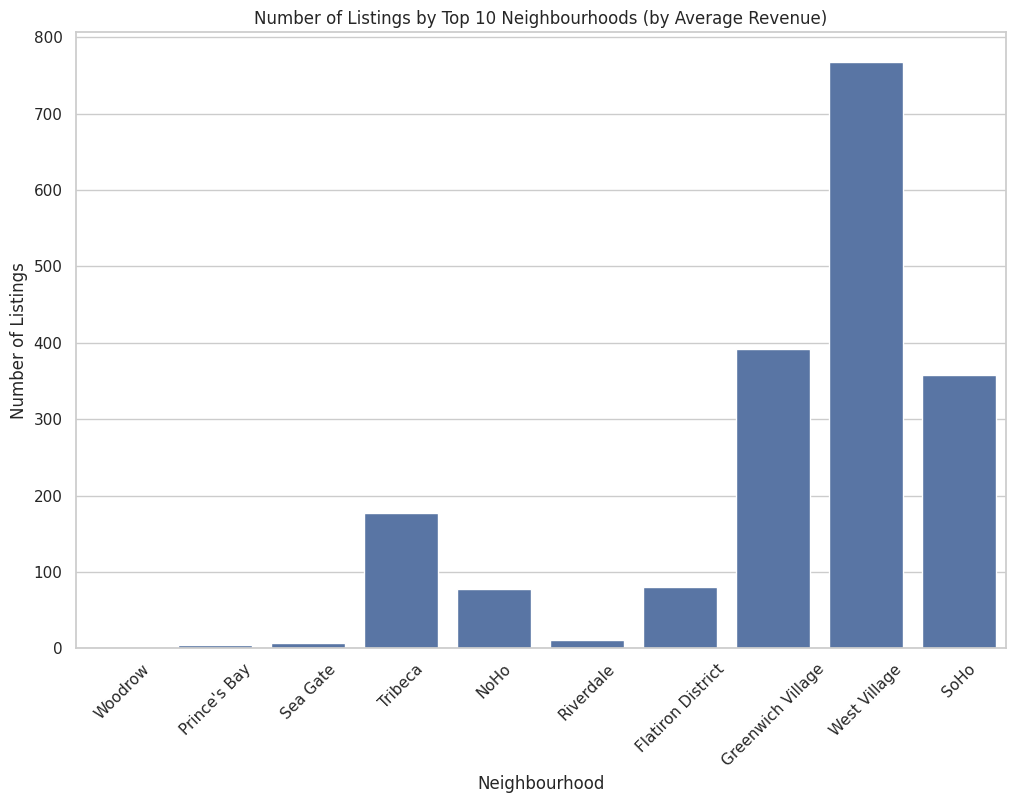

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Calculate average revenue by neighbourhood
avg_revenue_by_neighbourhood = df.groupby('neighbourhood')['revenue'].mean().sort_values(ascending=False)

# Select top 10 neighbourhoods by average revenue
top_10_neighbourhoods = avg_revenue_by_neighbourhood.head(10).index

# Filter the original dataframe to include only the top 10 neighbourhoods
df_top_10 = df[df['neighbourhood'].isin(top_10_neighbourhoods)]

# Count number of listings for top 10 neighbourhoods
listings_count_by_neighbourhood = df_top_10['neighbourhood'].value_counts().loc[top_10_neighbourhoods]

# Plot number of listings for top 10 neighbourhoods
plt.figure(figsize=(12, 8))
sns.barplot(x=listings_count_by_neighbourhood.index, y=listings_count_by_neighbourhood.values)
plt.title('Number of Listings by Top 10 Neighbourhoods (by Average Revenue)')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


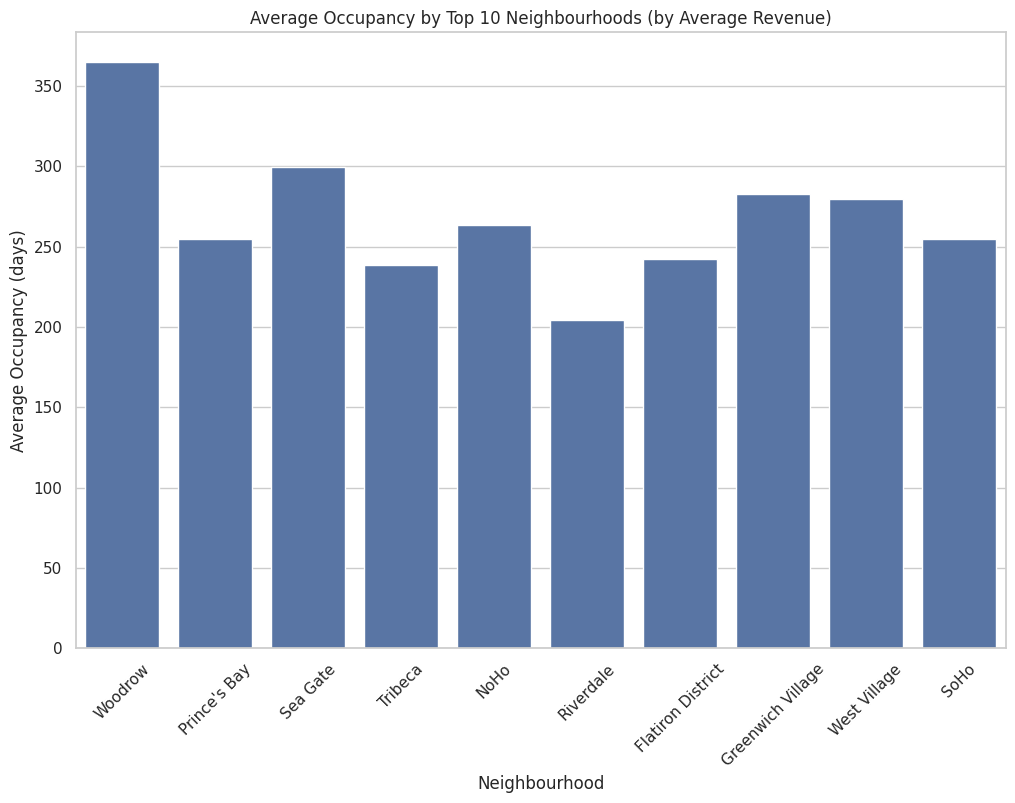

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Calculate average revenue by neighbourhood
avg_revenue_by_neighbourhood = df.groupby('neighbourhood')['revenue'].mean().sort_values(ascending=False)

# Select top 10 neighbourhoods by average revenue
top_10_neighbourhoods = avg_revenue_by_neighbourhood.head(10).index

# Filter the original dataframe to include only the top 10 neighbourhoods
df_top_10 = df[df['neighbourhood'].isin(top_10_neighbourhoods)]

# Calculate average occupancy for top 10 neighbourhoods
avg_occupancy_by_neighbourhood = df_top_10.groupby('neighbourhood')['occupancy'].mean().loc[top_10_neighbourhoods]

# Plot average occupancy for top 10 neighbourhoods
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_occupancy_by_neighbourhood.index, y=avg_occupancy_by_neighbourhood.values)
plt.title('Average Occupancy by Top 10 Neighbourhoods (by Average Revenue)')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Occupancy (days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


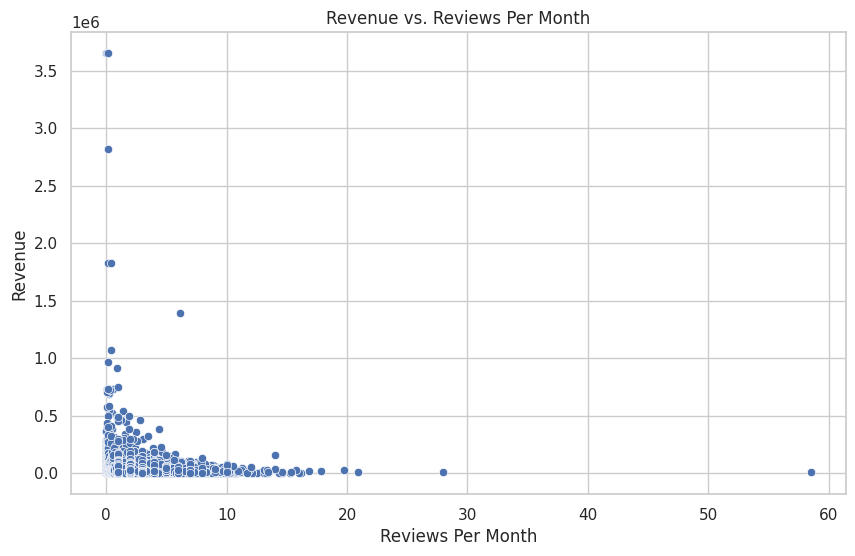

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Filter out rows where 'reviews_per_month' is missing
df = df.dropna(subset=['reviews_per_month'])

# Scatter Plot of Revenue vs. Reviews Per Month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reviews_per_month', y='revenue')
plt.title('Revenue vs. Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Revenue')
plt.show()


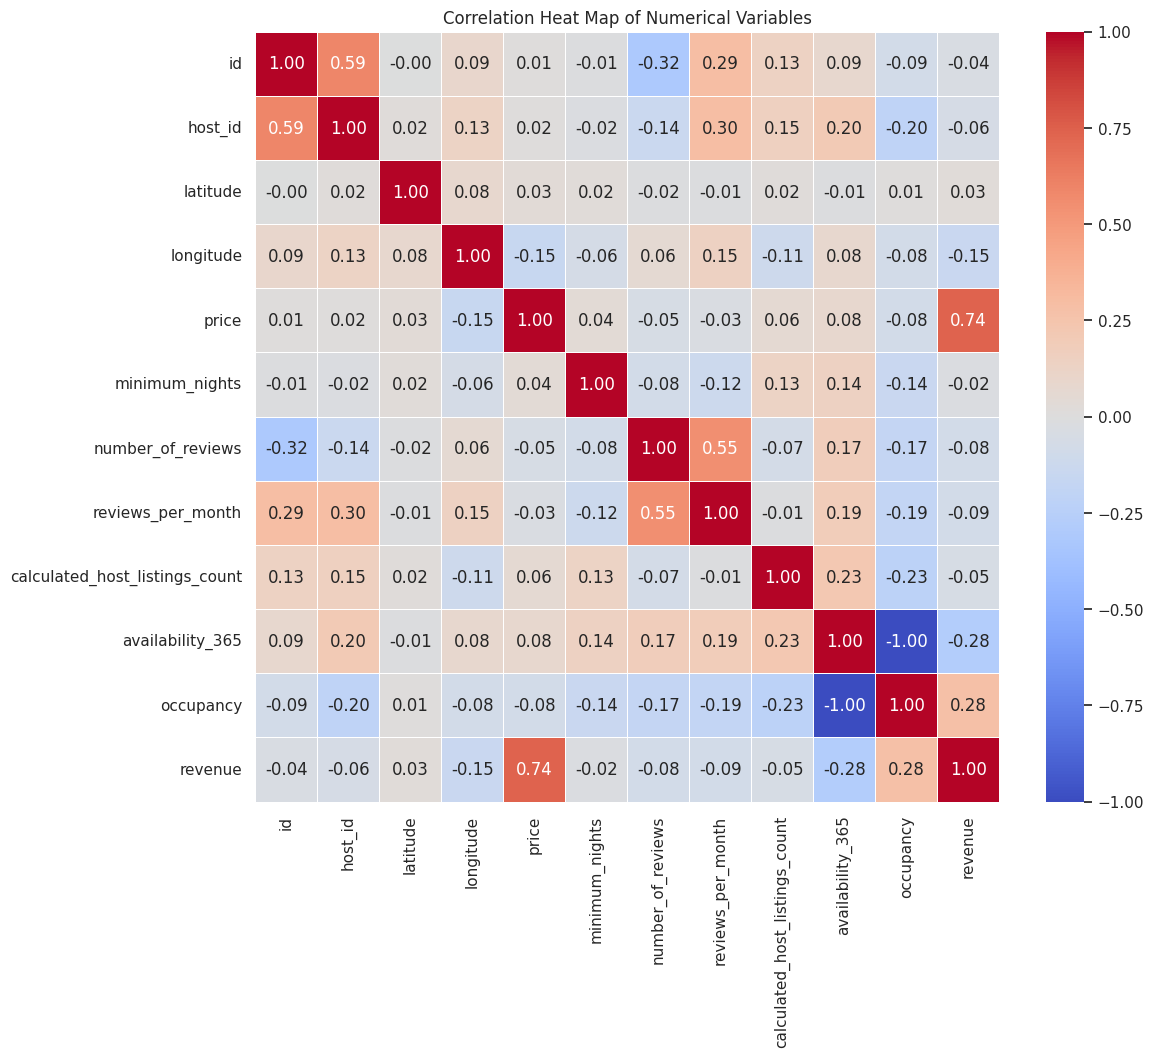

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(file_path)

# Compute occupancy and revenue
df['occupancy'] = 365 - df['availability_365']
df['revenue'] = df['price'] * df['occupancy']

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heat Map of Numerical Variables')
plt.show()
